In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import ast

## Exploratory Question: How do budget and revenue vary by year or by genre? #5

In [3]:
# Read in the data csv
movies_2015_2024 = pd.read_csv('../data/movies_2015_2024.csv')

In [4]:
# Converting financial data to 2024 dollars
# Store CPI values
cpi_data = pd.read_csv('../data/CPI_data.csv').set_index('Year')
budget_2024 = []
for year,budget in zip(movies_2015_2024['Year'], movies_2015_2024['Budget']):
    budget_adjusted = budget*(cpi_data.loc[2024,'CPI'] / cpi_data.loc[year,'CPI'])
    budget_2024.append(budget_adjusted)
# Reassign adjusted budget numbers to the Budget column
movies_2015_2024['Budget'] = budget_2024
revenue_2024 = []
for year,revenue in zip(movies_2015_2024['Year'], movies_2015_2024['Revenue']):
    revenue_adjusted = revenue*(cpi_data.loc[2024,'CPI'] / cpi_data.loc[year,'CPI'])
    revenue_2024.append(revenue_adjusted)
# Reassign adjusted budget numbers to the Revenue column
movies_2015_2024['Revenue'] = revenue_2024
# Dropping zero values from budget and revenue
movies_2015_2024 = movies_2015_2024[~((movies_2015_2024['Revenue'].round() == 0.0) | (movies_2015_2024['Budget'].round() == 0.0))]
movies_2015_2024['Profit'] = movies_2015_2024['Revenue'].sub(movies_2015_2024['Budget'], axis=0)
movies_2015_2024['Profitable'] = movies_2015_2024['Profit'] > 0
movies_2015_2024.head(2)

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,Profit,Profitable
0,Avengers: Age of Ultron,2015,"['Action', 'Adventure', 'Science Fiction']",7.271,23855,4.830729e+08,1.860034e+09,99861,1.376961e+09,True
1,Mad Max: Fury Road,2015,"['Action', 'Adventure', 'Science Fiction']",7.627,23511,1.985231e+08,5.014142e+08,76341,3.028911e+08,True


In [5]:
# Prepare the Genre column to be exploded
movies_2015_2024['Genre'] = movies_2015_2024['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

# Explode the Genre column of the df and don't affect the index however
movies_exploded = movies_2015_2024.explode('Genre', ignore_index = False)
movies_exploded.head(2)

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,Profit,Profitable
0,Avengers: Age of Ultron,2015,Action,7.271,23855,4.830729e+08,1.860034e+09,99861,1.376961e+09,True
0,Avengers: Age of Ultron,2015,Adventure,7.271,23855,4.830729e+08,1.860034e+09,99861,1.376961e+09,True


In [6]:
# Convert the Budget, Revenue, and Profit columns from scientific notation to integers
movies_2015_2024['Budget'] = movies_2015_2024['Budget'].astype('int64') 
movies_2015_2024['Revenue'] = movies_2015_2024['Revenue'].astype('int64')
movies_2015_2024['Profit'] = movies_2015_2024['Profit'].astype('int64')

In [7]:
movies_2015_2024.nlargest(3, "Revenue")

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,Profit,Profitable
401,Avengers: Endgame,2019,"[Adventure, Science Fiction, Action]",8.237,26930,436809021,3434888353,299534,2998079332,True
6,Star Wars: The Force Awakens,2015,"[Adventure, Action, Science Fiction]",7.254,20076,324254399,2737267792,140607,2413013393,True
300,Avengers: Infinity War,2018,"[Adventure, Action, Science Fiction]",8.235,31141,374767330,2563927015,299536,2189159685,True


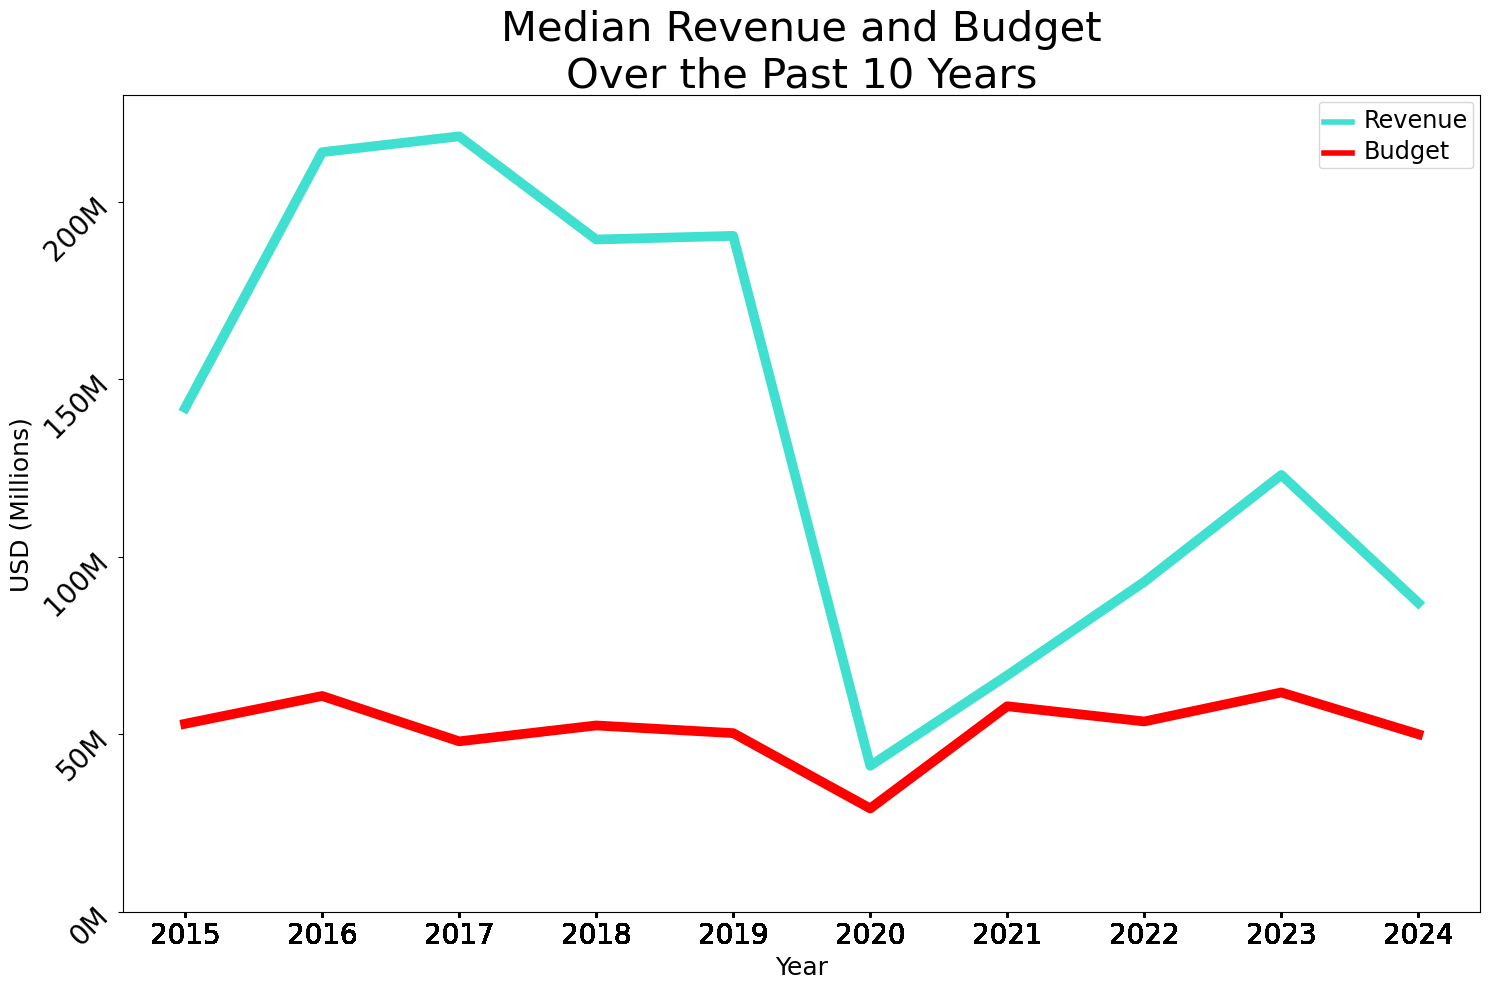

In [8]:
# Create new mini df where each year the median of Revenue calculated 
median_rev_by_year = movies_2015_2024.groupby('Year')['Revenue'].median().reset_index()
# Create new mini df where each year the median of Budget calculated
median_budget_by_year = movies_2015_2024.groupby('Year')['Budget'].median().reset_index()

# use matiplotlib.dates to pull every single year instead of every other year in the x-axis
years = mdates.YearLocator()   # every year
# use matiplotlib.dates to format the dates as YYYY
years_fmt = mdates.DateFormatter('%Y')

# create plot with a larger figure size than the default
fig, ax = plt.subplots(figsize=(15, 10))
# plot each line on the figure
median_rev_by_year.plot(ax=ax, x='Year', y='Revenue', kind='line', color='turquoise', linewidth=7.0, ylim=(0,230000000))
median_budget_by_year.plot(ax=ax, x='Year', y='Budget', kind='line', color='red', linewidth=7.0)

# a function of matplotlib that defines where the major ticks go on the x-axis and the format those ticks are in
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# sets were the year values are pulled from, their labels, and how large and their orientation
ax.set_xticks(movies_2015_2024["Year"])
ax.set_xticklabels(movies_2015_2024["Year"], rotation=0, fontsize=20)
ax.set_xlabel('Year', fontsize=18)

# formatting of y-axis labels and removing the scientific notation and putting the values in USD millions
plt.yticks(rotation=45, fontsize = 20);
ax.set_ylabel('USD (Millions)', fontsize=18)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))

# setting the title of the figure and the formatting of it
ax.set_title('Median Revenue and Budget\nOver the Past 10 Years', fontsize = 30)
ax.legend(fontsize = 30)

# assigning the leg variable to the legend creating plt code
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('xx-large')

plt.tight_layout()

#saving the image of the figure to the assets directory on my local machine
plt.savefig('../assets/rev_budget_by_year.png', dpi = 150);

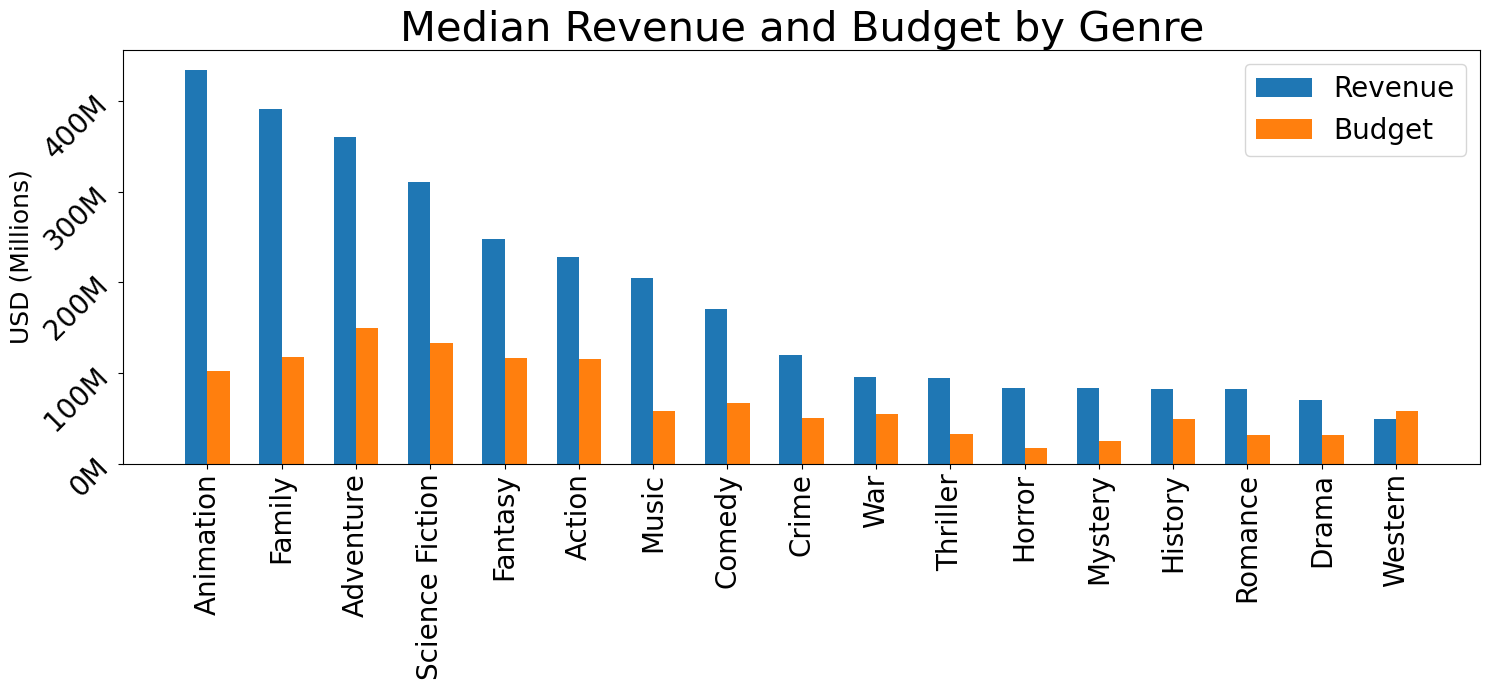

In [9]:
# Create new mini df where each year the median of Revenue and Budget are calculated 
median_rev_by_year = movies_exploded.groupby('Genre')['Revenue'].median().sort_values(ascending=False)
median_budget_by_year = movies_exploded.groupby('Genre')['Budget'].median().loc[median_rev_by_year.index]

# width set and set the length of the array to no larger/longer than the unique list of genres
w, x = 0.3, np.arange(len(movies_exploded["Genre"].unique()))

# initiate figure and set its larger than default size
fig, ax = plt.subplots(figsize=(15, 7))

# create two bar charts and set them next to one another for revenue and budget respectively
ax.bar(x - w/2, median_rev_by_year, width=w, label="Revenue")
ax.bar(x + w/2, median_budget_by_year, width=w, label="Budget")

# the ticks and labels are pulled from the x variable set above formatted
ax.set_xticks(x)
ax.set_xticklabels(median_rev_by_year.index, rotation=90, fontsize=20)

# formatting of y-axis labels and removing the scientific notation and putting the values in USD millions
plt.yticks(rotation=45, fontsize = 20);
ax.set_ylabel('USD (Millions)', fontsize=18)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))

# setting the title of the figure and the formatting of it
ax.set_title('Median Revenue and Budget by Genre', fontsize = 30)
ax.legend(fontsize = 20)

plt.tight_layout()

#saving the image of the figure to the assets directory on my local machine
plt.savefig('../assets/rev_budget_by_genre.png', dpi = 150);